In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# K-Means Clustering
* Also known as Lloyd-Forgy Algorithm

<div style="border: 2px solid #2c3e50; 
            padding: 15px; 
            border-radius: 8px; 
            background-color: #e8f8f5; 
            color: #2c3e50; 
            font-family: 'Segoe UI', Tahoma, sans-serif; 
            box-shadow: 2px 2px 6px rgba(0,0,0,0.1);">

<h3 style="color:#117864;">Notebook Intro</h3>

<p>
This notebook explores clustering, an unsupervised learning technique for grouping similar data points without labels.
 It explains K-Means, Hierarchical Clustering, DBSCAN, and Gaussian Mixture Models, along with methods for choosing 
the number of clusters. As part of the series,
 it provides a comprehensive foundation in unsupervised learning, bridging mathematical intuition with practical implementation.
</p>

</div>

# Introduction to Clustering

Clustering is an **unsupervised learning** technique that groups similar data points together based on feature similarity, without using labeled outputs.

In simpler terms, clustering tries to find structure in data by organizing it into groups where members of a group are more similar to each other than to those in other groups.

---

## Types of Clustering Algorithms

1. **Centroid-based Clustering**  
   - Example: K-Means
2. **Density-based Clustering**  
   - Example: DBSCAN
3. **Hierarchical Clustering**  
   - Agglomerative (bottom-up), Divisive (top-down)
4. **Model-based Clustering**  
   - Example: Gaussian Mixture Models (GMM)

---

# K-Means Clustering

K-Means partitions the dataset into **K clusters**, where each point belongs to the cluster with the nearest centroid.

###  Algorithm Steps:

1. Initialize `K` cluster centroids (random or k-means++).
2. Assign each data point to the nearest centroid.
3. Recalculate centroids as the mean of assigned points.
4. Repeat steps 2 and 3 until convergence.

###  Objective Function

We minimize the **within-cluster sum of squares (WCSS)**:

$$
J = \sum_{i=1}^{K} \sum_{\mathbf{x} \in C_i} \|\mathbf{x} - \boldsymbol{\mu}_i\|^2
$$

Where:
-  $C_i$: Cluster $ i $  
-  $\boldsymbol{\mu}_i$: Centroid of cluster $i$  
- $\| \cdot \|$: Euclidean norm

---

#  Hierarchical Clustering

Creates a **tree of clusters** using a bottom-up or top-down approach.

###  Linkage Criteria

- **Single Linkage**: Minimum distance between clusters  
- **Complete Linkage**: Maximum distance between clusters  
- **Average Linkage**: Mean distance between points in clusters
-**Ward Linkage**:minimizes total within-cluster variance

---

# DBSCAN

DBSCAN groups points that are close together and marks others as noise.

###  Key Parameters

-  $\varepsilon$: Radius of the neighborhood  
- `minPts`: Minimum number of points required to form a dense region

###  Terms

- **Core point**: Has ≥ `minPts` neighbors within $ \varepsilon $  
- **Border point**: Close to a core point but not dense enough itself  
- **Noise**: Neither a core nor a border point

---

#  Gaussian Mixture Models (GMM)

Each cluster is modeled as a **Gaussian distribution**. GMM gives a soft probability assignment to each cluster.

###  Probability Model

$$
p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)
$$

Where:
-  $\pi_k$: Weight for cluster  $k$  
-  $\mathcal{N}$: Multivariate Normal distribution  
-  $\boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k$: Mean and Covariance matrix

---

#  How to Choose K?

## 1. Elbow Method

Plot WCSS (Within-Cluster Sum of Squares) for increasing \( K \).  
Choose the "elbow point" where adding more clusters doesn't significantly reduce WCSS.

## 2. Silhouette Score

Measures how well a point fits in its cluster:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

$Where:
-  $a(i)$: Average intra-cluster distance  
-  $b(i)$: Distance to nearest other cluster

Closer to 1 means better clustering.

## 3. BIC / AIC (GMM Only)

Lower **BIC** (Bayesian Information Criterion) or **AIC** indicates a better model fit.

---

#  Summary Table

| Algorithm       | Shape Support | Requires K? | Handles Noise? |
|----------------|----------------|-------------|----------------|
| K-Means        | Spherical       |  Yes       |  No          |
| Hierarchical   | Varies          | Optional  |  No          |
| DBSCAN         | Arbitrary       |  No        |  Yes         |
| GMM            | Elliptical      |  Yes       |  No          |

---

>  Up next: we'll demonstrate these algorithms on toy datasets (`blobs`, `moons`) and real examples.


# Parameters of `KMeans`

```python
from sklearn.cluster import KMeans
```

```python
KMeans(
    n_clusters=8,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=1e-4,
    verbose=0,
    random_state=None,
    algorithm='lloyd'
)
```

| Parameter       | Description |
|----------------|-------------|
| `n_clusters`    | Number of clusters (K). |
| `init`          | Method to initialize centroids. Options: `'k-means++'`, `'random'`, or ndarray. |
| `n_init`        | Number of times the algorithm will be run with different centroid seeds. |
| `max_iter`      | Maximum iterations for a single run. |
| `tol`           | Convergence threshold for centroid changes. |
| `verbose`       | Output verbosity level. Use 0 (silent), 1 (info), etc. |
| `random_state`  | Fix seed for reproducibility. |
| `algorithm`     | Algorithm to use: `'lloyd'` (default) or `'elkan'`. |

---

# Parameters of `make_blobs`

```python
from sklearn.datasets import make_blobs
```

```python
make_blobs(
    n_samples=100,
    n_features=2,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False
)
```

| Parameter        | Description |
|------------------|-------------|
| `n_samples`       | Total number of data points to generate (int or list). |
| `n_features`      | Number of features (dimensions). Default is 2. |
| `centers`         | Number of clusters or actual coordinates of centers. |
| `cluster_std`     | Standard deviation of clusters (float or list). Controls spread. |
| `center_box`      | Tuple `(min, max)` — bounds for cluster center generation. |
| `shuffle`         | Whether to shuffle samples after generation. |
| `random_state`    | Controls randomness. Set integer for reproducibility. |
| `return_centers`  | If `True`, returns both data and center locations. |

---

>  These tools are especially useful for creating synthetic datasets and benchmarking clustering performance.

# Step-by-Step K-Means with Code and Explanation

[[2.51189016 0.97066867]
 [2.32158546 1.09786826]
 [1.54632313 4.212973  ]
 [2.09680487 3.7174206 ]
 [2.14169366 1.77022776]
 [0.91433877 4.55014643]] [1 1 0 0 1 0]


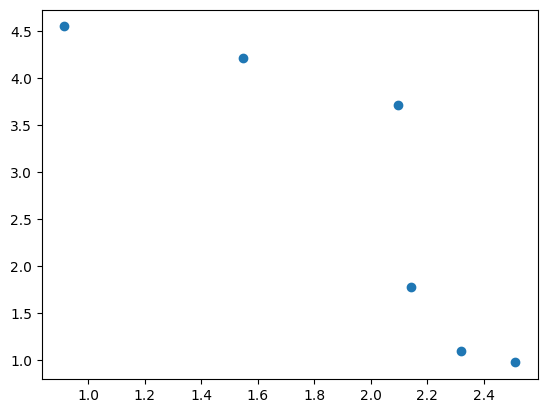

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X,y_true = make_blobs (n_samples=6,n_features=2,centers=2,cluster_std=0.60, random_state=0)
print(X,y_true)
plt.scatter(X[:,0],X[:,1])

In [ ]:
#manual initialization with centroids
initial_centroids = np.array([X[0],X[2]])

In [ ]:
#Assign Each Point to Nearest Centroid
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

    return np.argmin(distances, axis=1)


In [ ]:
def recalculate_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])


In [ ]:
steps = []
centroids = initial_centroids.copy()

for _ in range(3):  # Run for 3 steps manually
    labels = assign_clusters(X, centroids)

    steps.append((centroids.copy(), labels.copy()))
    centroids = recalculate_centroids(X, labels, k=2)
    print(centroids)


[[2.32505643 1.27958823]
 [1.51915559 4.16018001]]
[[2.32505643 1.27958823]
 [1.51915559 4.16018001]]
[[2.32505643 1.27958823]
 [1.51915559 4.16018001]]


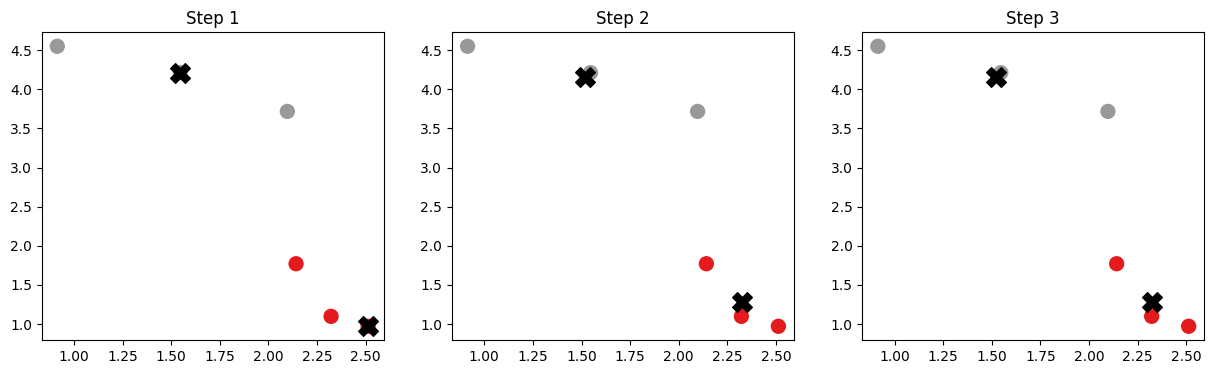

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for i, (centroids, labels) in enumerate(steps):
    axs[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=100)
    axs[i].scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X')
    axs[i].set_title(f"Step {i + 1}")


In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
newsgroup = fetch_20newsgroups(subset='all')

df = pd.DataFrame({
    'test':newsgroup.data,
    'label_name':[newsgroup.target_names[i] for i in newsgroup.target]
})

df.head()


,test,label_name
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,rec.sport.hockey
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,comp.sys.ibm.pc.hardware
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,talk.politics.mideast
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,comp.sys.ibm.pc.hardware
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,comp.sys.mac.hardware


In [ ]:

import matplotlib.pyplot as plt


In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import  PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
categories = ['sci.space', 'comp.graphics', 'rec.sport.baseball']
data = fetch_20newsgroups(subset='train',categories=categories,shuffle=True, random_state=42)

In [ ]:
#custom tokenizer with stemming and stopword removal
def tokenizer(text):
  tokens = word_tokenize(text) # Use standard word_tokenize
  stop_words = set(stopwords.words('english'))
  stemmer = PorterStemmer()
  return [stemmer.stem(w.lower()) for w in tokens if w.lower() not in stop_words and w.isalpha()]

| Component          | Used for                               | Input Type   | Output Type          |
| ------------------ | -------------------------------------- | ------------ | -------------------- |
| `TfidfVectorizer`  | All-in-one (tokenize + TF + IDF)       | Raw text     | TF-IDF sparse matrix |
| `TfidfTransformer` | Just converts **word counts → TF-IDF** | Count matrix | TF-IDF sparse matrix |


In [ ]:
import nltk
nltk.download('punkt_tab') # Removed unnecessary download

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=tokenizer)
X_tfidf = vectorizer.fit_transform(data.data)

print(X_tfidf)



/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 152147 stored elements and shape (1774, 15860)>
  Coords	Values
  (0, 7571)	0.2513694474224105
  (0, 7255)	0.2513694474224105
  (0, 13454)	0.018289081701086417
  (0, 5664)	0.1033029948584861
  (0, 7885)	0.4471501010254352
  (0, 12300)	0.3419980156026723
  (0, 9918)	0.018843497233258066
  (0, 13747)	0.1350272552792699
  (0, 14672)	0.03339797285995738
  (0, 13829)	0.0626457725497478
  (0, 7987)	0.018361350252307326
  (0, 3708)	0.04478025836436145
  (0, 6681)	0.14244283976839994
  (0, 773)	0.033658741890354456
  (0, 12778)	0.23906191097098523
  (0, 7374)	0.10441176351998434
  (0, 15600)	0.03005171376110715
  (0, 2984)	0.0749766220466511
  (0, 6537)	0.17863727195945153
  (0, 3684)	0.07715936464775287
  (0, 14107)	0.09145058397373186
  (0, 12764)	0.11953095548549261
  (0, 5701)	0.11300769829506672
  (0, 8598)	0.06500491997471924
  (0, 6985)	0.09353511663818827
  :	:
  (1773, 6255)	0.08668605103131068
  (1773, 8018)	0.092965452828

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k,random_state=42)

| Method             | Purpose                                                 | Output                                      |
| ------------------ | ------------------------------------------------------- | ------------------------------------------- |
| `fit_predict(X)`   | Fit the model and return cluster labels                 | ➜ Array of cluster labels for each sample   |
| `fit_transform(X)` | Fit the model and return transformed data (not labels!) | ➜ Distance of each sample to every centroid |


In [ ]:
labels = kmeans.fit_predict(X_tfidf)
print (labels)

[2 2 0 ... 1 0 0]


In [ ]:
# Silhouette score
score = silhouette_score(X_tfidf, labels)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.01


| Score Range | Meaning                                    |
| ----------- | ------------------------------------------ |
| **+1**      | Perfect clustering (tight, well-separated) |
| **0**       | Clusters are **overlapping or ambiguous**  |
| **< 0**     | Bad clustering (wrong assignment)          |


In [ ]:
# PCA for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_tfidf.toarray())
print(X_reduced.shape)

(1774, 2)


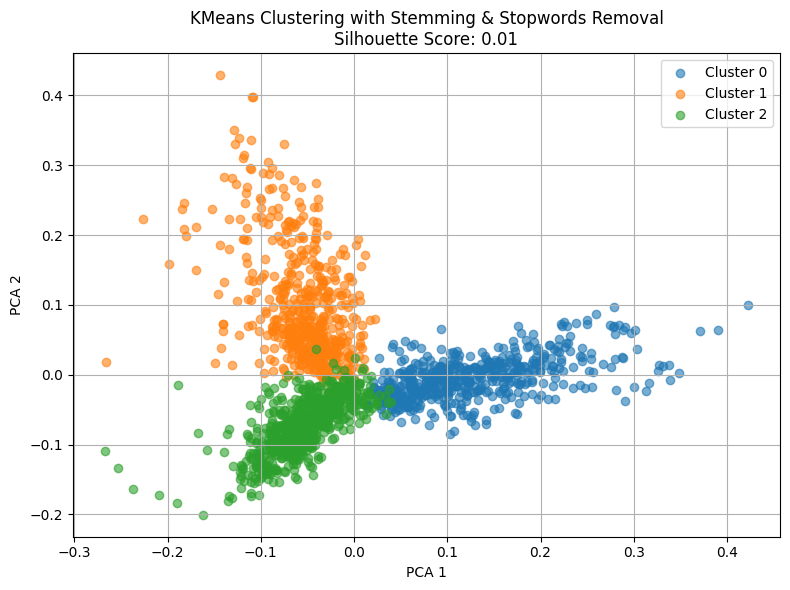

In [ ]:
# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_reduced[labels == i, 0], X_reduced[labels == i, 1], label=f'Cluster {i}', alpha=0.6)
plt.title(f'KMeans Clustering with Stemming & Stopwords Removal\nSilhouette Score: {score:.2f}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

inertia_ = sum of squared distances between each sample and its closest centroid.

In [ ]:
new_sentences = [
    "NASA is planning a new mission to Mars in 2027.",
    "The 3D rendering in this graphics software is mind-blowing.",
    "The Yankees won the baseball game in extra innings.",
    "Astrophysicists discovered a new black hole near the Milky Way.",
    "Photoshop is the most powerful image editing tool I’ve used.",
    "The pitcher threw a perfect game in last night’s match.",
    "SpaceX successfully launched another satellite.",
    "OpenGL is essential for real-time rendering in game engines.",
    "The outfielder made an incredible diving catch!",
    "Astronauts train for months before heading to the International Space Station."
]


In [ ]:
X_new_tfidf = vectorizer.transform(new_sentences)
new_labels = kmeans.predict(X_new_tfidf)

In [ ]:
print(X_new_tfidf,new_labels)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 55 stored elements and shape (10, 15860)>
  Coords	Values
  (0, 8385)	0.5109977249080925
  (0, 8894)	0.485571061109194
  (0, 9278)	0.4088928091742114
  (0, 9419)	0.32955019295137306
  (0, 10593)	0.4767655720407878
  (1, 5644)	0.4425646909777223
  (1, 11558)	0.7476830495436253
  (1, 12882)	0.4950823686266135
  (2, 1118)	0.35035753107350825
  (2, 4607)	0.5438945169808079
  (2, 5279)	0.32334150055135846
  (2, 6759)	0.5023282449705079
  (2, 15722)	0.4738617553087975
  (3, 853)	0.5277569199288241
  (3, 1415)	0.3069822919642613
  (3, 3649)	0.36842339756469267
  (3, 6237)	0.3183021847179204
  (3, 8822)	0.4807879891046514
  (3, 9330)	0.29728551498190403
  (3, 9419)	0.19029100696746076
  (3, 15260)	0.1855693670848088
  (4, 4084)	0.45548404184039276
  (4, 6537)	0.3061474773342483
  (4, 10486)	0.563871825364051
  (4, 10799)	0.3481439700265573
  :	:
  (5, 9501)	0.3603913463404528
  (5, 10353)	0.4156151458698583
  (5, 10560)	0.3417873455

In [ ]:
for i,(sent,label) in enumerate(zip(new_sentences,new_labels),1):
  print(f"{i:02d}. Cluster {label}: {sent}")


01. Cluster 1: NASA is planning a new mission to Mars in 2027.
02. Cluster 2: The 3D rendering in this graphics software is mind-blowing.
03. Cluster 0: The Yankees won the baseball game in extra innings.
04. Cluster 2: Astrophysicists discovered a new black hole near the Milky Way.
05. Cluster 2: Photoshop is the most powerful image editing tool I’ve used.
06. Cluster 0: The pitcher threw a perfect game in last night’s match.
07. Cluster 1: SpaceX successfully launched another satellite.
08. Cluster 0: OpenGL is essential for real-time rendering in game engines.
09. Cluster 2: The outfielder made an incredible diving catch!
10. Cluster 1: Astronauts train for months before heading to the International Space Station.


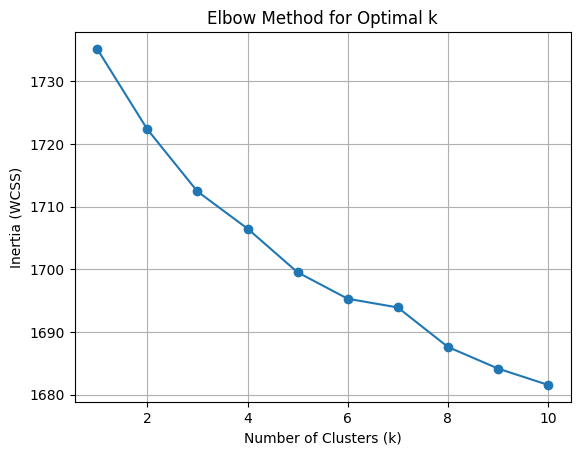

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_tfidf)
    inertias.append(model.inertia_)

plt.plot(K, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)
plt.show()


In [ ]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_tfidf)
    score = silhouette_score(X_tfidf, labels)
    print(f"k = {k}, Silhouette Score = {score:.3f}")


k = 2, Silhouette Score = 0.007
k = 3, Silhouette Score = 0.008
k = 4, Silhouette Score = 0.008
k = 5, Silhouette Score = 0.008
k = 6, Silhouette Score = 0.008
k = 7, Silhouette Score = 0.007
k = 8, Silhouette Score = 0.007
k = 9, Silhouette Score = 0.007
k = 10, Silhouette Score = 0.008


# Parameters of DBSCAN

| Parameter           | Type         | Default       | What it does                                                              |
| ------------------- | ------------ | ------------- | ------------------------------------------------------------------------- |
| **`eps`**           | float        | `0.5`         | Maximum distance between two samples for one to be considered a neighbor. |
| **`min_samples`**   | int          | `5`           | Minimum number of points to form a **core point** (includes itself).      |
| **`metric`**        | str          | `'euclidean'` | Distance metric (can use `'manhattan'`, `'cosine'`, `'haversine'`, etc).  |
| **`metric_params`** | dict or None | `None`        | Additional keyword args for metric function.                              |
| **`algorithm`**     | str          | `'auto'`      | Search algorithm: `'auto'`, `'ball_tree'`, `'kd_tree'`, or `'brute'`.     |
| **`leaf_size`**     | int          | `30`          | Leaf size for BallTree or KDTree (only relevant if used).                 |
| **`n_jobs`**        | int or None  | `None`        | Parallel jobs. `-1` uses all processors. (only applies to some metrics).  |


| Parameter          | Type                          | Default | Description                                                               |
| ------------------ | ----------------------------- | ------- | ------------------------------------------------------------------------- |
| **`n_samples`**    | int or tuple                  | `100`   | Total number of samples (or a tuple like `(n1, n2)` for class imbalance). |
| **`noise`**        | float                         | `0.0`   | Standard deviation of Gaussian noise added to the data.                   |
| **`shuffle`**      | bool                          | `True`  | Whether to shuffle the samples.                                           |
| **`random_state`** | int, `RandomState`, or `None` | `None`  | Ensures reproducibility if set.                                           |


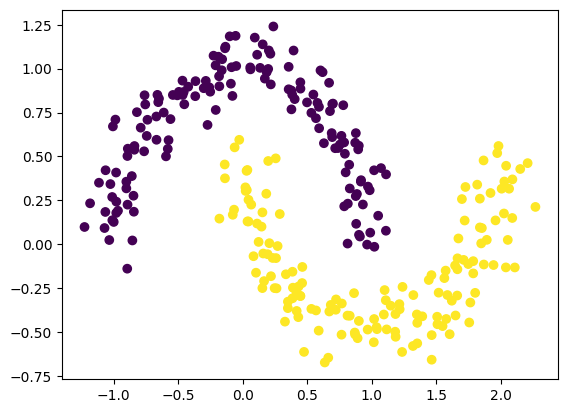

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

X,y_true = make_moons(n_samples=300, noise=0.1,random_state=42)
plt.scatter(X[:,0],X[:,1], c=y_true)

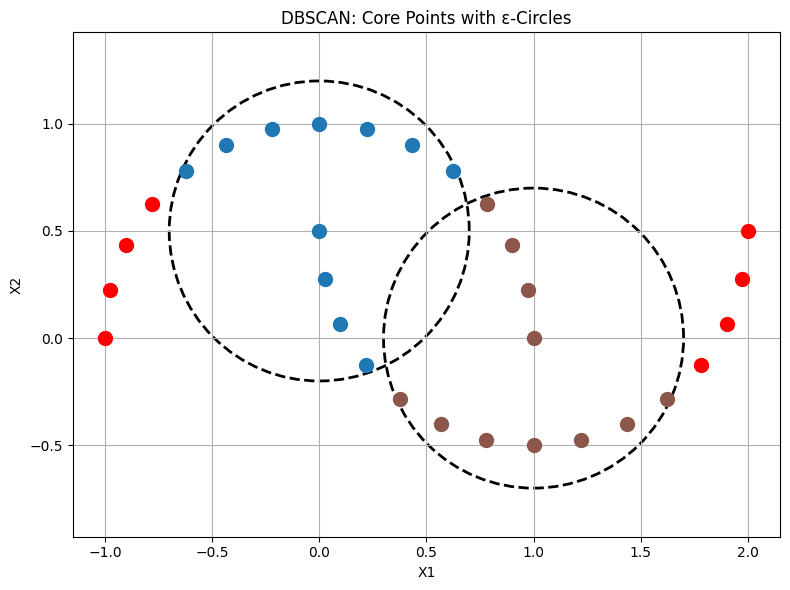

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

# # Generate slightly more points
X, _ = make_moons(n_samples=30, noise=0, random_state=42)
from sklearn.datasets import make_blobs
# X, _ = make_blobs(n_samples=50, centers=2, cluster_std=0.3, random_state=0)

# Updated DBSCAN params
eps = 0.7
min_samples = 10
db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X)

# Core point mask
core_mask = np.zeros_like(labels, dtype=bool)
core_mask[db.core_sample_indices_] = True

# Plotting
plt.figure(figsize=(8, 6))
ax = plt.gca()

colors = plt.get_cmap('tab10', len(set(labels)))

for i, (point, label) in enumerate(zip(X, labels)):
    if core_mask[i]:
        circle = Circle(point, eps, color='black', fill=False, linestyle='--', linewidth=2)
        ax.add_patch(circle)
    color = 'red' if label == -1 else colors(label)
    plt.plot(point[0], point[1], 'o', color=color, markersize=10)

plt.title("DBSCAN: Core Points with ε-Circles")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()


# Let us visualize DBSCAN


In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np


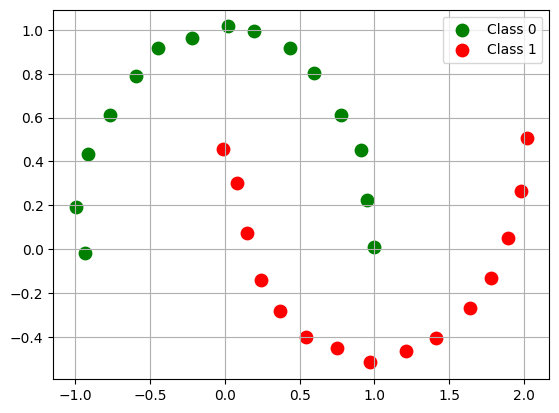

In [ ]:
X,y_true = make_moons(n_samples=30,noise=0.02,random_state=42)
for value,color,label in zip([0,1],['green','red'],['Class 0','Class 1']):
  plt.scatter(
      X[y_true==value,0],X[y_true==value,1],c=color, s=80,label=label
  )
#plt.scatter(X[:,0],X[:,1],c=colors,s=80,label=lables)
plt.legend()
plt.grid(True)

In [ ]:
eps = 0.7
min_samples=10
db=DBSCAN(eps=eps,min_samples=min_samples)
labels=db.fit_predict(X)
print(labels,db.core_sample_indices_)

[-1  0  1  0  0  0 -1  1 -1  1 -1  0  0 -1 -1  1  1  1 -1  1  1 -1  0 -1
  1  0  0 -1  1  0] [1 9]


In [ ]:
core_mask=np.zeros_like(labels,dtype=bool)
core_mask[db.core_sample_indices_] = True
print(core_mask)

[False  True False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False]


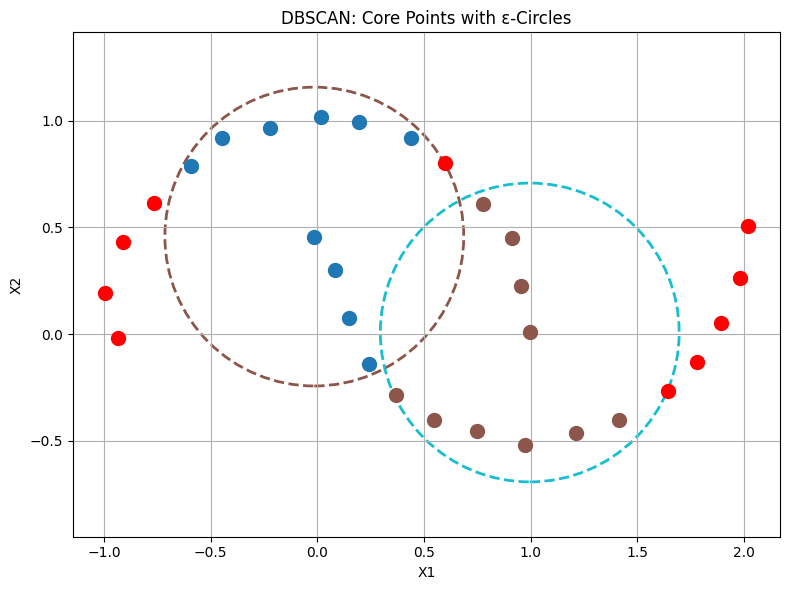

In [ ]:
plt.figure(figsize=(8,6))
ax=plt.gca()
#gathering colors that are of the length of the number of clusters
colors = plt.get_cmap('tab10', len(set(labels)))
for i, (point,label) in enumerate(zip(X,labels)):
  if core_mask[i]:
    circle = Circle(point, eps, color=colors(i), fill=False, linestyle='--', linewidth=2)
    ax.add_patch(circle)
  color = 'red' if label==-1 else colors(label)
  plt.plot(point[0], point[1], 'o', color=color, markersize=10)

plt.title("DBSCAN: Core Points with ε-Circles")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()

# Explanation
###  DBSCAN: Core Points with ε-Circles

This plot demonstrates how DBSCAN identifies clusters based on density:

- **Each point** on the plot represents a 2D data sample from `make_moons()`.
- **Colors** indicate the cluster assignment given by DBSCAN:
  - 🔴 **Red points** are *noise points* — they do not belong to any cluster.
  - 🔵🟤 Other colors represent points belonging to detected clusters.
- **Dashed circles** (ε-circles) are drawn only around **core points**:
  - A core point is one that has at least `min_samples` neighbors within a radius `eps`.
  - These circles help visualize the density neighborhood for each core point.

This visual is helpful to:
- Understand how `eps` and `min_samples` influence the clustering.
- See why certain points are treated as noise.
- Observe the shape and density of clusters in 2D space.




# Drawing Circle Basics

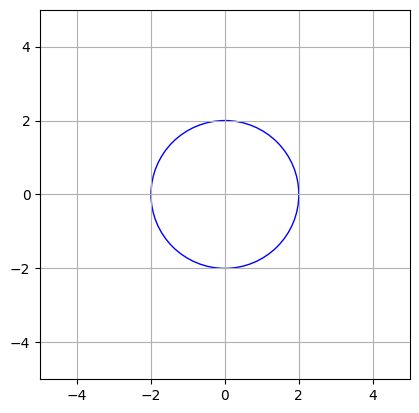

In [ ]:
fig, ax = plt.subplots()

center = (0, 0)
circle = Circle(center, 2.0, fill=False, color='blue')
ax.add_patch(circle)

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
plt.grid(True)

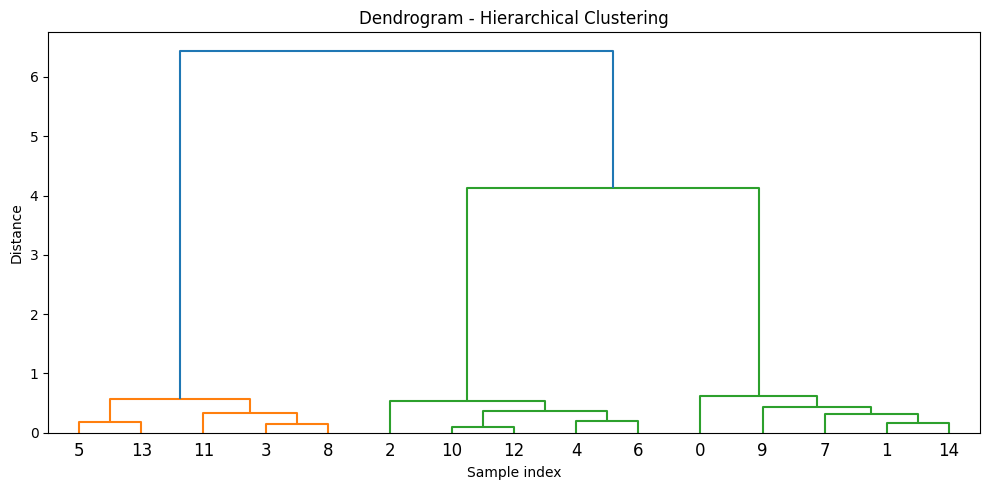

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Generate simple 2D blob data
X, y_true = make_blobs(n_samples=15, centers=3, cluster_std=1.0, random_state=42)

# Step 2: Scale the data for better cluster performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Compute linkage matrix using Ward's method
linked = linkage(X_scaled, method='ward')  # 'ward' minimizes within-cluster variance

# Step 4: Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


| Parameter            | Purpose                                                             |
| -------------------- | ------------------------------------------------------------------- |
| `n_clusters`         | Number of clusters to form                                          |
| `metric`           | Metric used to compute linkage (`'euclidean'`, `'manhattan'`, etc.) |
| `linkage`            | Method to merge clusters (`ward`, `complete`, `average`, `single`)  |
| `distance_threshold` | Cut tree at a given distance instead of setting `n_clusters`        |


In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
import matplotlib.pyplot as plt


In [ ]:
iris=load_iris()
X=iris.data
feature_names = iris.feature_names

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
linked = linkage(X_scaled,method='ward')
print(linked)

[[1.01000000e+02 1.42000000e+02 0.00000000e+00 2.00000000e+00]
 [7.00000000e+00 3.90000000e+01 1.21167870e-01 2.00000000e+00]
 [1.00000000e+01 4.80000000e+01 1.21167870e-01 2.00000000e+00]
 [0.00000000e+00 1.70000000e+01 1.31632184e-01 2.00000000e+00]
 [9.00000000e+00 3.40000000e+01 1.31632184e-01 2.00000000e+00]
 [1.28000000e+02 1.32000000e+02 1.31632184e-01 2.00000000e+00]
 [1.27000000e+02 1.38000000e+02 1.33836265e-01 2.00000000e+00]
 [2.00000000e+00 4.70000000e+01 1.33836265e-01 2.00000000e+00]
 [1.90000000e+01 4.60000000e+01 1.43378956e-01 2.00000000e+00]
 [8.00000000e+01 8.10000000e+01 1.43378956e-01 2.00000000e+00]
 [1.00000000e+00 2.50000000e+01 1.66143388e-01 2.00000000e+00]
 [1.20000000e+02 1.43000000e+02 1.66143388e-01 2.00000000e+00]
 [1.10000000e+01 2.40000000e+01 1.70512281e-01 2.00000000e+00]
 [4.00000000e+01 1.53000000e+02 1.72216546e-01 3.00000000e+00]
 [3.00000000e+01 1.54000000e+02 1.72216546e-01 3.00000000e+00]
 [2.90000000e+01 1.57000000e+02 1.78366645e-01 3.000000

Text(0, 0.5, 'Distance')

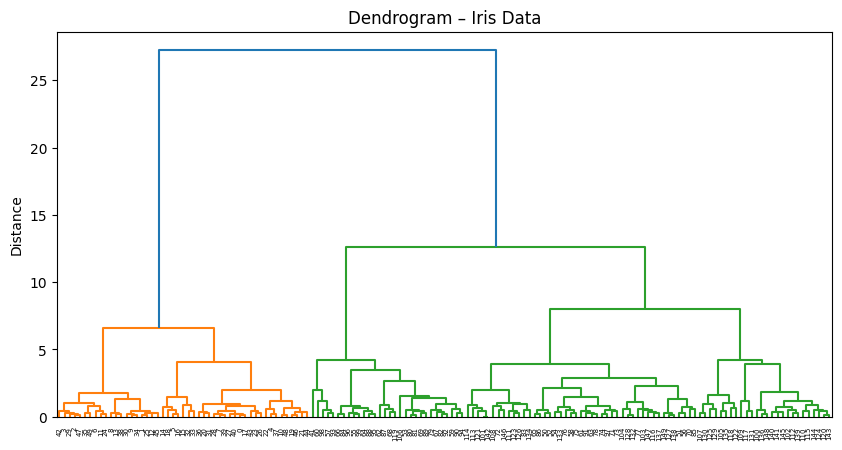

In [ ]:
plt.figure(figsize=(10,5))
dendrogram(linked, orientation='top', distance_sort='ascending',show_leaf_counts=False)
plt.title("Dendrogram – Iris Data")
#plt.xlabel("Customer Index")
plt.ylabel("Distance")

In [ ]:
# cut the dandogram - 3 clusters
aglo = AgglomerativeClustering(n_clusters=3, metric='euclidean',linkage='ward')
labels=aglo.fit_predict(X_scaled)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [ ]:
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['cluster']=labels
df[df['cluster']==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
41,4.5,2.3,1.3,0.3,2
53,5.5,2.3,4.0,1.3,2
55,5.7,2.8,4.5,1.3,2
57,4.9,2.4,3.3,1.0,2
59,5.2,2.7,3.9,1.4,2


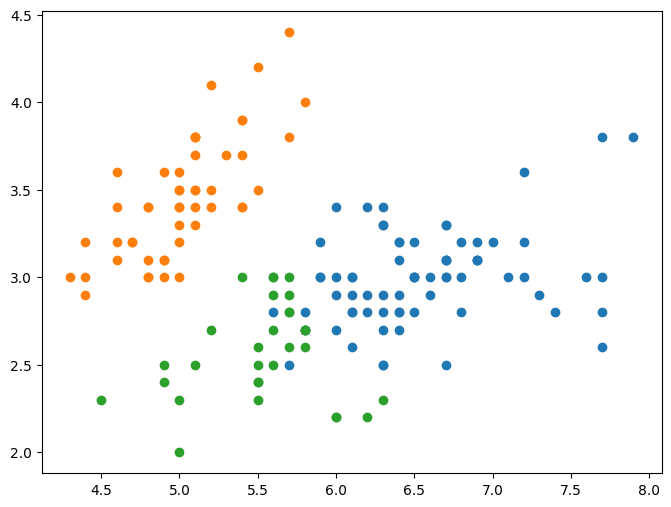

In [ ]:
plt.figure(figsize=(8,6))

for cluster_id in range(5):
  plt.scatter(X[labels == cluster_id,0],X[labels == cluster_id,1], label=f"Cluster {cluster_id}")


[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66155811]
 

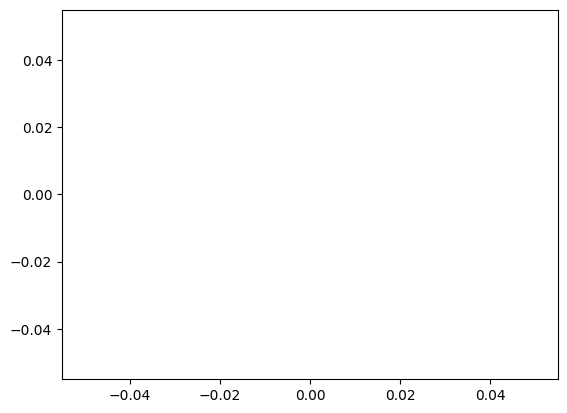

In [ ]:
from sklearn.decomposition import PCA

X_2d = PCA(n_components=2).fit_transform(X_scaled)
print(X_2d)
plt.scatter(X_2d[labels == cluster_id, 0], X_2d[labels == cluster_id, 1])


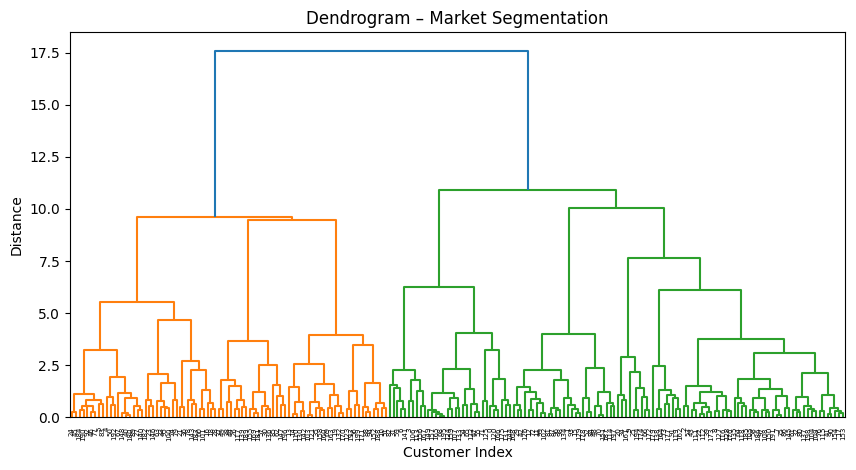


Cluster Profile:


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,30.56,51.55,58.93
1,51.97,55.46,23.93
2,37.41,81.83,23.65
3,44.78,70.09,56.48


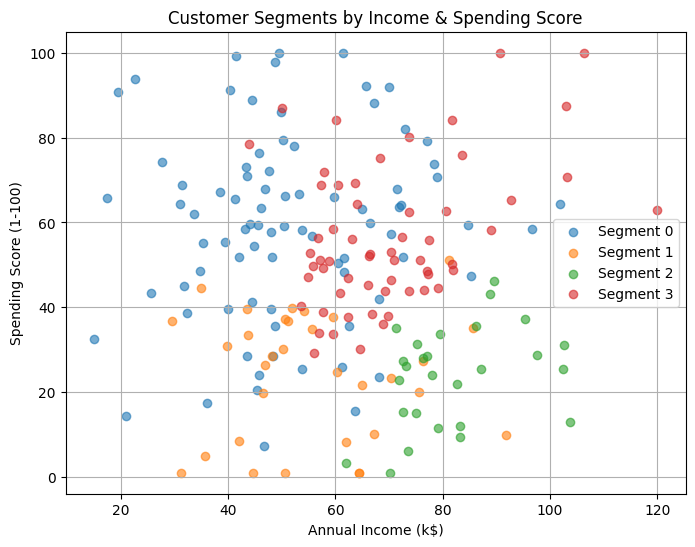

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,45,67.155747,10.139309,1
1,38,71.215691,35.015624,2
2,47,81.661025,50.131092,3
3,58,81.076041,51.174515,1
4,37,32.446613,38.748363,0
...,...,...,...,...
95,22,46.141808,63.472751,0
96,43,77.991998,24.068846,2
97,43,66.145990,45.241533,3
98,40,76.257242,28.109544,2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Step 1: Create synthetic customer data
np.random.seed(42)
n = 200
age = np.random.normal(40, 12, n).clip(18, 70).astype(int)
income = np.random.normal(60, 20, n).clip(15, 120)
spending_score = np.random.normal(50, 25, n).clip(1, 100)

df = pd.DataFrame({
    'Age': age,
    'Annual Income (k$)': income,
    'Spending Score (1-100)': spending_score
})

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Compute linkage matrix using Ward's method
linked = linkage(X_scaled, method='ward')

# Step 4: Display dendrogram to decide number of clusters
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
plt.title("Dendrogram – Market Segmentation")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()

# Step 5: Cut dendrogram – form 4 clusters
num_clusters = 4
df['Cluster'] = fcluster(linked, num_clusters, criterion='maxclust') - 1  # 0-index

# Step 6: Analyze each segment
summary = df.groupby('Cluster').mean().round(2)
print("\nCluster Profile:")
display(summary)

# Step 7: Visualize segments in 2D
plt.figure(figsize=(8, 6))
for cluster in sorted(df['Cluster'].unique()):
    subset = df[df['Cluster'] == cluster]
    plt.scatter(subset['Annual Income (k$)'], subset['Spending Score (1-100)'],
                label=f'Segment {cluster}', alpha=0.6)
plt.title("Customer Segments by Income & Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()
df.head(100)